### House Pricing

In this project we'll try to apply different techniques (Data Transformation, Hyperparameter Optimization, Advanced Models, etc.) to create a model with a great behavior capable of predicting different house prices.


The project has three parts:

PART A - Data Transformation

-Imputation of missing values

-Detection and elimination of outliers

-Encoding

-Data Scaling

We'll create a benchmark with the transformed data.

PART B - Advanced models

PART C - Interpretation of the models

Try to answer different questions like:

-Which variables were relevant for the model?

-Which variables were not?

-Were is the model failing? Why?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pr = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

print(pr.shape)

pr.head() 


(146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [4]:
#Are there any missing values?
pr.isna() 

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
146656,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
146657,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
146658,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
def missing_values():
    temp_dict = dict()
    for i in pr.columns:
        if pr[i].isnull().sum() > 0: 
            temp_dict[i] = pr[i].isnull().sum()
    return temp_dict

In [6]:
missing_values()

{'lat': 9925,
 'lon': 9959,
 'bathrooms': 5957,
 'surface_total': 20527,
 'surface_covered': 21614}

In [7]:
#Study the correlation of the variables
pr.corr()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.975578,-0.010933,0.007618,0.019923,-0.019598,-0.004156,0.013393
lon,-0.975578,1.000000,-0.006931,-0.016905,-0.028612,-0.049097,-0.014388,0.009368
rooms,-0.010933,-0.006931,1.000000,0.869769,0.613308,0.081044,0.075012,0.351025
bedrooms,0.007618,-0.016905,0.869769,1.000000,0.588527,0.079229,0.072627,0.316192
bathrooms,0.019923,-0.028612,0.613308,0.588527,1.000000,0.061159,0.069361,0.556861
surface_total,-0.019598,-0.049097,0.081044,0.079229,0.061159,1.000000,0.430887,0.038727
surface_covered,-0.004156,-0.014388,0.075012,0.072627,0.069361,0.430887,1.000000,0.049136
price,0.013393,0.009368,0.351025,0.316192,0.556861,0.038727,0.049136,1.000000


In [8]:
#We'll delete lat and long because we want to predict the price and the correlation with this variable is not significant

del(pr['lat'])
del(pr['lon'])

Text(0.5, 1.0, 'Real estate by region')

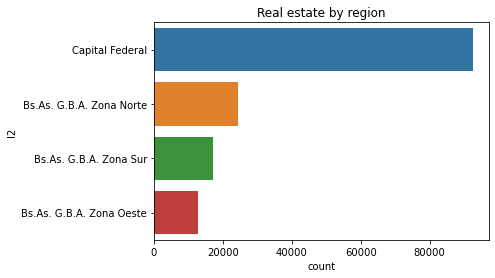

In [9]:
#What can we find in the l2 column?
sns.countplot(y = 'l2', data = pr, order = pr['l2'].value_counts().index) 
plt.title('Real estate by region')

Text(0.5, 1.0, 'Country')

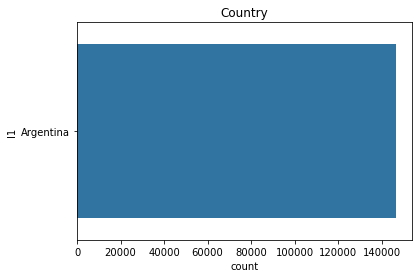

In [11]:
#Where is the data from?
sns.countplot(y = 'l1', data = pr, order = pr['l1'].value_counts().index)
plt.title('Country')

In [12]:
#We now know that all the data is from Argentina so we delete this column:
del(pr['l1'])

Text(0.5, 1.0, 'Currency')

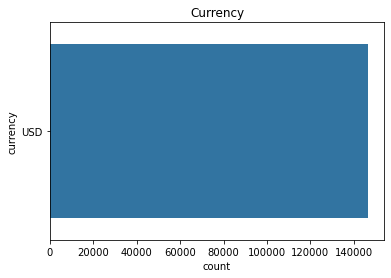

In [13]:
sns.countplot(y = 'currency', data = pr, order = pr['currency'].value_counts().index) 
plt.title('Currency')

Text(0.5, 1.0, 'Operation Type')

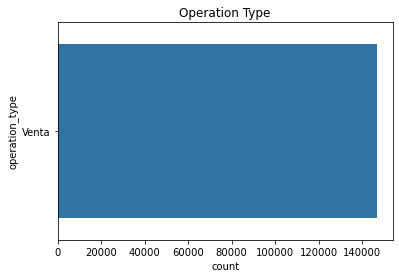

In [16]:
sns.countplot(y = 'operation_type', data = pr, order = pr['operation_type'].value_counts().index) 
plt.title('Operation Type')

In [17]:
#Drop all the columns we won't need
pr1 = pr.drop(['start_date', 'end_date', 'created_on', 'currency', 'description', 'operation_type'], axis=1, inplace = True)

In [18]:
pr.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,PH
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,58 entre 1 y 2 Venta de departamento en ph.1 ...,PH


Text(0.5, 1.0, 'property type')

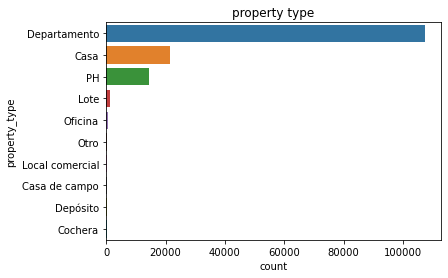

In [20]:
#We want to see the property type
sns.countplot(y = 'property_type', data = pr, order = pr['property_type'].value_counts().index) 
plt.title('property type')

In [21]:
#We will work with the three first property types because are very bigger than the others
#Create different masks
casa = pr['property_type'] == 'Casa' 
dpto = pr['property_type'] == 'Departamento'
ph = pr['property_type'] == 'PH'

In [23]:
df2 = pr[casa] #Create a df with each mask  
df3 = pr[dpto]
df4 = pr[ph]


In [24]:
df = pd.concat([df2, df3, df4])

### Part A

#### Missing Values

In [25]:
#Now that we modify the original dataset, we need to know if we still have missing values

def missing_values1():
    temp_dict = dict()
    for i in df.columns:
        if df[i].isnull().sum() > 0: 
            temp_dict[i] = df[i].isnull().sum()
    return temp_dict

In [26]:
missing_values1()

{'bathrooms': 4211, 'surface_total': 18623, 'surface_covered': 18909}

In [27]:
#see "bathrooms" distribution

print(df["bathrooms"].describe())

count    138934.000000
mean          1.597715
std           0.885980
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          14.000000
Name: bathrooms, dtype: float64


In [32]:
#We impute the values by their median because this is not a normal distribution. We also know that up to 75% of the data, bathrooms do not exceed 2 
#If we use the mean, the number must be 1.6 and we can't have 1.6 bathrooms in one house (that's not possible).
print('The median is', df.bathrooms.median())


The median is 1.0


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

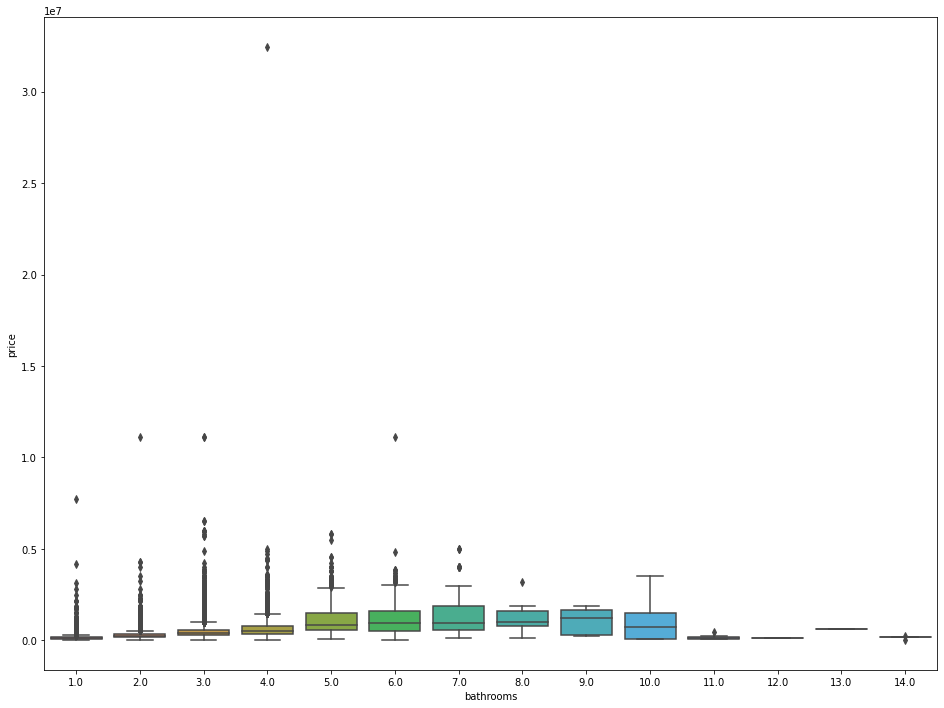

In [33]:
plt.figure(figsize=(16, 12))
sns.boxplot(x="bathrooms", y="price", data=pr)

In [34]:
#Surfaces
df["surface_total"].describe()

count    124522.000000
mean        182.381089
std        1436.708405
min          10.000000
25%          52.000000
50%          78.000000
75%         138.000000
max      169000.000000
Name: surface_total, dtype: float64

In [35]:
df["surface_covered"].describe()

count    124236.000000
mean        112.374159
std         919.025616
min           1.000000
25%          47.000000
50%          68.000000
75%         108.000000
max      126062.000000
Name: surface_covered, dtype: float64

In [38]:
#Impute the values by their median again (this is not a normal distribution and the median has sense)
df.bathrooms.fillna(df.bathrooms.median(), inplace = True)

In [39]:
df["bathrooms"].describe()

count    143145.000000
mean          1.580132
std           0.878675
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          14.000000
Name: bathrooms, dtype: float64

In [40]:
#After the imputation, the distribution doesn't change

In [41]:
missing_values1()

{'surface_total': 18623, 'surface_covered': 18909}

In [42]:
#We follow the same line to be consistent with out analysis. We impute the different values by their median.
df.surface_covered.fillna(df.surface_covered.median(), inplace = True)
df.surface_total.fillna(df.surface_total.median(), inplace = True)

In [43]:
df1 = df['surface_covered'] <= df['surface_total']  #Delete the rows where surface covered is bigger than total surface (It doesn't make sense)

print(df1.value_counts())

df = df[df1]

True     141113
False      2032
dtype: int64


#### Work with outliers

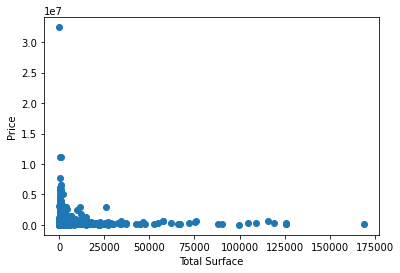

In [45]:
#Relation with price and surface
plt.scatter(df["surface_total"], df["price"])
plt.xlabel("Total Surface")
plt.ylabel("Price")
plt.show()

In [46]:
df.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,141113.000000,141113.000000,141113.000000,141113.000000,141113.000000,1.411130e+05
mean,3.089609,1.994104,1.579330,169.547859,98.792422,2.381418e+05
std,1.378654,1.120709,0.876066,1349.599775,686.970829,2.862867e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,55.000000,49.000000,1.125000e+05
50%,3.000000,2.000000,1.000000,78.000000,68.000000,1.669000e+05
75%,4.000000,3.000000,2.000000,122.000000,98.000000,2.650000e+05
max,35.000000,15.000000,14.000000,169000.000000,126062.000000,3.243423e+07


In [47]:
#We drop the points that seem more distant
drop_index_list = df[df['surface_total'] > 79000].index.tolist()
df.drop(drop_index_list, inplace=True)
print("avoiding the above dataframe printing")

avoiding the above dataframe printing


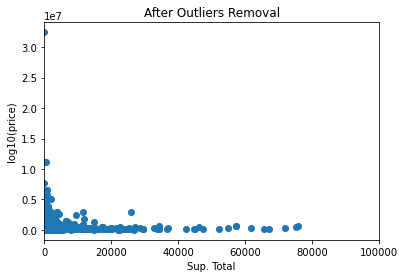

In [48]:
# Plot again after dropping value

plt.scatter(df["surface_total"], df["price"])
plt.title("After Outliers Removal")
plt.xlabel("Sup. Total")
plt.ylabel("log10(price)")
plt.xlim(0, 100000)
plt.show()

In [49]:
#Now we see one outlier in the price
drop_index_list2 = df[df['price'] > 3000000].index.tolist()
df.drop(drop_index_list2, inplace=True)
print("avoiding the above dataframe printing")

avoiding the above dataframe printing


In [57]:
#Are there any house or ph with more than 2000m2 of covered surface?
df[df.surface_covered > 2000]


,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type
1974,Bs.As. G.B.A. Zona Norte,Pilar,6.0,5.0,5.0,2973.0,2973.0,750000.0,"IMPONENTE Casa 6 amb, 5 hab en suite.Mapuche P...",Casa
62535,Bs.As. G.B.A. Zona Sur,San Vicente,1.0,1.0,1.0,3100.0,3100.0,78600.0,Fracción de 3100 m2 con Quincho y Pileta,Casa
68094,Bs.As. G.B.A. Zona Sur,San Vicente,1.0,1.0,1.0,3100.0,3100.0,78600.0,Fracción de 3100 m2 con Quincho y Pileta,Casa
68095,Bs.As. G.B.A. Zona Sur,San Vicente,1.0,1.0,1.0,3100.0,3100.0,78600.0,Fracción de 3100 m2 con Quincho y Pileta,Casa
119084,Bs.As. G.B.A. Zona Norte,Pilar,6.0,5.0,5.0,2973.0,2973.0,750000.0,"IMPONENTE Casa 6 amb, 5 hab en suite.Mapuche P...",Casa
...,...,...,...,...,...,...,...,...,...,...
145309,Capital Federal,Villa Lugano,4.0,3.0,1.0,7274.0,7274.0,89000.0,VENTA 4 AMB 73m2 LUMINOSO LUGANO B°NAGERA,Departamento
16095,Capital Federal,Balvanera,2.0,1.0,1.0,2748.0,2748.0,55000.0,OPORTUNIDAD PH 2 AMBIENTES CON PATIO,PH
48467,Bs.As. G.B.A. Zona Norte,General San Martín,3.0,2.0,1.0,4483.0,4483.0,68000.0,VENTA PH 3 AMBIENTES VILLA. BALLESTER SAN MARTIN,PH
52420,Capital Federal,Balvanera,2.0,1.0,1.0,2748.0,2748.0,55000.0,OPORTUNIDAD PH 2 AMBIENTES CON PATIO,PH


In [58]:
#After analyzing the results we see that these properties do not make sense and must be typing errors...
drop_index_list = df[df['surface_total'] > 2000].index.tolist()
df.drop(drop_index_list, inplace=True)
print("avoiding the above dataframe printing")

avoiding the above dataframe printing


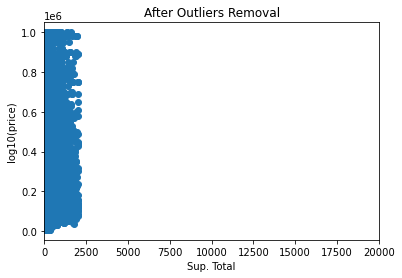

In [59]:
plt.scatter(df["surface_total"], df["price"])
plt.title("After Outliers Removal")
plt.xlabel("Sup. Total")
plt.ylabel("log10(price)")
plt.xlim(0,20000)
plt.show()

In [60]:
#Following this line, we see the mean and the median of the price and drop outliers according these metrics
drop_index_list3 = df[df['price'] > 1000000].index.tolist()
df.drop(drop_index_list3, inplace=True)
print("avoiding the above dataframe printing")

avoiding the above dataframe printing


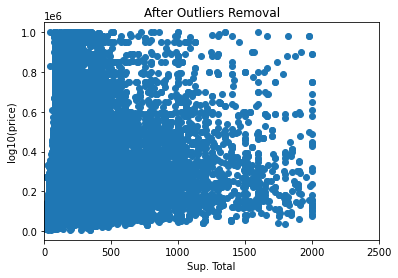

In [63]:
plt.scatter(df["surface_total"], df["price"])
plt.title("After Outliers Removal")
plt.xlabel("Sup. Total")
plt.ylabel("log10(price)")
plt.xlim(0, 2500)
plt.show()

In [90]:
del(df['Datos_Reescalados'])

In [65]:
#Now, see the correlation
df.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.867432,0.585076,0.487405,0.653887,0.526375
bedrooms,0.867432,1.000000,0.557310,0.446997,0.617738,0.492754
bathrooms,0.585076,0.557310,1.000000,0.371048,0.530921,0.637059
surface_total,0.487405,0.446997,0.371048,1.000000,0.696821,0.311441
surface_covered,0.653887,0.617738,0.530921,0.696821,1.000000,0.544441
price,0.526375,0.492754,0.637059,0.311441,0.544441,1.000000


#### Scale the data 

In [67]:
#Scale the surface

valor_medio = df.surface_total.mean()
std = df.surface_total.std()
df['Datos_Reescalados'] = (df.surface_total - valor_medio)/std
df.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type,Datos_Reescalados
137,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,89.0,79.0,219000.0,Venta Duplex super luminoso y comodo en Sender...,Casa,-0.204094
138,Bs.As. G.B.A. Zona Oeste,Ituzaingó,3.0,2.0,1.0,292.0,90.0,110000.0,CASA 3 AMBIENTES SOBRE LOTE 10 X 20,Casa,1.055179
252,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,2.0,325.0,325.0,120000.0,"12 entre 485 y 486.Casa en venta, Villa Castel...",Casa,1.259889
253,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,3.0,1023.0,360.0,650000.0,18 entre 491 y 491bis - Casa en Venta en Gonnet,Casa,5.589802
254,Bs.As. G.B.A. Zona Norte,San Isidro,6.0,3.0,3.0,1000.0,190.0,370000.0,Venta Casa en San Isidro G.B.A. Zona Norte ABR...,Casa,5.447126


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


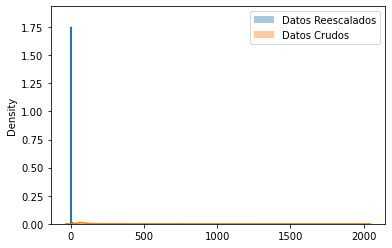

In [68]:
sns.distplot(df.Datos_Reescalados.values, label = 'Datos Reescalados')
sns.distplot(df.surface_total.values, label = 'Datos Crudos')
plt.legend()
plt.show()

In [69]:
#Covered surface

valor_medio = df.surface_covered.mean()
std = df.surface_covered.std()
df['surface_covered_R'] = (df.surface_covered - valor_medio)/std
df.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type,Datos_Reescalados,surface_covered_R
137,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,89.0,79.0,219000.0,Venta Duplex super luminoso y comodo en Sender...,Casa,-0.204094,-0.079608
138,Bs.As. G.B.A. Zona Oeste,Ituzaingó,3.0,2.0,1.0,292.0,90.0,110000.0,CASA 3 AMBIENTES SOBRE LOTE 10 X 20,Casa,1.055179,0.092215
252,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,2.0,325.0,325.0,120000.0,"12 entre 485 y 486.Casa en venta, Villa Castel...",Casa,1.259889,3.762986
253,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,3.0,1023.0,360.0,650000.0,18 entre 491 y 491bis - Casa en Venta en Gonnet,Casa,5.589802,4.309697
254,Bs.As. G.B.A. Zona Norte,San Isidro,6.0,3.0,3.0,1000.0,190.0,370000.0,Venta Casa en San Isidro G.B.A. Zona Norte ABR...,Casa,5.447126,1.654246


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


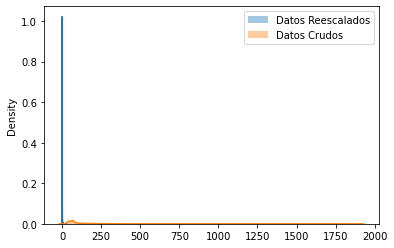

In [70]:
sns.distplot(df.surface_covered_R.values, label = 'Datos Reescalados')
sns.distplot(df.surface_covered.values, label = 'Datos Crudos')
plt.legend()
plt.show()

In [71]:
#Bathrooms

valor_medio = df.bathrooms.mean()
std = df.bathrooms.std()
df['bathrooms_R'] = (df.bathrooms - valor_medio)/std
df.head()

valor_medio1 = df.rooms.mean()
std1 = df.rooms.std()
df['rooms_R'] = (df.rooms - valor_medio1)/std1
df.head()

valor_medio2 = df.bedrooms.mean()
std2 = df.bedrooms.std()
df['bedrooms_R'] = (df.bedrooms - valor_medio2)/std2
df.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type,Datos_Reescalados,surface_covered_R,bathrooms_R,rooms_R,bedrooms_R
137,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,89.0,79.0,219000.0,Venta Duplex super luminoso y comodo en Sender...,Casa,-0.204094,-0.079608,0.573044,-0.032344,0.034482
138,Bs.As. G.B.A. Zona Oeste,Ituzaingó,3.0,2.0,1.0,292.0,90.0,110000.0,CASA 3 AMBIENTES SOBRE LOTE 10 X 20,Casa,1.055179,0.092215,-0.661412,-0.032344,0.034482
252,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,2.0,325.0,325.0,120000.0,"12 entre 485 y 486.Casa en venta, Villa Castel...",Casa,1.259889,3.762986,0.573044,2.975885,0.944297
253,Bs.As. G.B.A. Zona Sur,La Plata,7.0,3.0,3.0,1023.0,360.0,650000.0,18 entre 491 y 491bis - Casa en Venta en Gonnet,Casa,5.589802,4.309697,1.807499,2.975885,0.944297
254,Bs.As. G.B.A. Zona Norte,San Isidro,6.0,3.0,3.0,1000.0,190.0,370000.0,Venta Casa en San Isidro G.B.A. Zona Norte ABR...,Casa,5.447126,1.654246,1.807499,2.223827,0.944297


In [72]:
df.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Datos_Reescalados,surface_covered_R,bathrooms_R,rooms_R,bedrooms_R
rooms,1.000000,0.867432,0.585076,0.487405,0.653887,0.526375,0.487405,0.653887,0.585076,1.000000,0.867432
bedrooms,0.867432,1.000000,0.557310,0.446997,0.617738,0.492754,0.446997,0.617738,0.557310,0.867432,1.000000
bathrooms,0.585076,0.557310,1.000000,0.371048,0.530921,0.637059,0.371048,0.530921,1.000000,0.585076,0.557310
surface_total,0.487405,0.446997,0.371048,1.000000,0.696821,0.311441,1.000000,0.696821,0.371048,0.487405,0.446997
surface_covered,0.653887,0.617738,0.530921,0.696821,1.000000,0.544441,0.696821,1.000000,0.530921,0.653887,0.617738
price,0.526375,0.492754,0.637059,0.311441,0.544441,1.000000,0.311441,0.544441,0.637059,0.526375,0.492754
Datos_Reescalados,0.487405,0.446997,0.371048,1.000000,0.696821,0.311441,1.000000,0.696821,0.371048,0.487405,0.446997
surface_covered_R,0.653887,0.617738,0.530921,0.696821,1.000000,0.544441,0.696821,1.000000,0.530921,0.653887,0.617738
bathrooms_R,0.585076,0.557310,1.000000,0.371048,0.530921,0.637059,0.371048,0.530921,1.000000,0.585076,0.557310
rooms_R,1.000000,0.867432,0.585076,0.487405,0.653887,0.526375,0.487405,0.653887,0.585076,1.000000,0.867432


In [73]:
df.drop(['bedrooms', 'bathrooms', 'rooms', 'surface_total','surface_covered'], axis=1, inplace=True)

#### Encoding

In [74]:
#We want to see if categorical variables have relation with the price

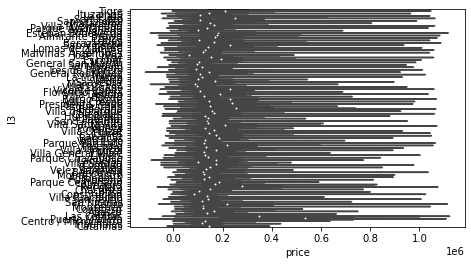

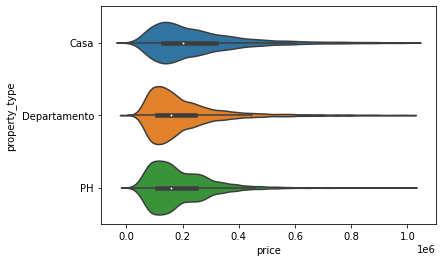

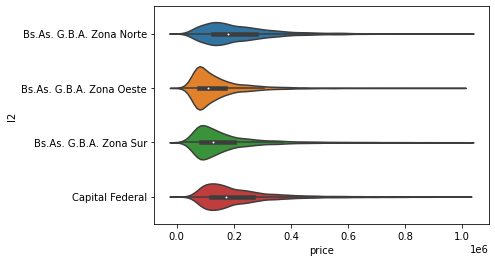

In [75]:
few_cat_variables = ['l3', 'property_type', 'l2']

#Ploteamos las indicadas
for i in range(len(few_cat_variables)):
    sns.violinplot(y=few_cat_variables[i], x='price', data=df)
    plt.show()

In [76]:
del(df['title'])

In [77]:
del(df['l3'])

In [78]:
df.head()

,l2,price,property_type,Datos_Reescalados,surface_covered_R,bathrooms_R,rooms_R,bedrooms_R
137,Bs.As. G.B.A. Zona Norte,219000.0,Casa,-0.204094,-0.079608,0.573044,-0.032344,0.034482
138,Bs.As. G.B.A. Zona Oeste,110000.0,Casa,1.055179,0.092215,-0.661412,-0.032344,0.034482
252,Bs.As. G.B.A. Zona Sur,120000.0,Casa,1.259889,3.762986,0.573044,2.975885,0.944297
253,Bs.As. G.B.A. Zona Sur,650000.0,Casa,5.589802,4.309697,1.807499,2.975885,0.944297
254,Bs.As. G.B.A. Zona Norte,370000.0,Casa,5.447126,1.654246,1.807499,2.223827,0.944297


In [79]:
important_categorical_vars = ['property_type', 'l2']

# Let us once again categories of these important variables
for col in important_categorical_vars:
    print(col, ": ", df[col].unique())
    

property_type :  ['Casa' 'Departamento' 'PH']
l2 :  ['Bs.As. G.B.A. Zona Norte' 'Bs.As. G.B.A. Zona Oeste'
 'Bs.As. G.B.A. Zona Sur' 'Capital Federal']


In [80]:
encoded_columns = pd.get_dummies(df[['property_type', 'l2']]) #Make a numeric column with the property_type

In [81]:
df = df.join(encoded_columns).drop('property_type', axis=1) #Add the numerical columns to the dataset

In [82]:
df.drop('l2', axis=1, inplace=True)

In [83]:
df.head()

,price,Datos_Reescalados,surface_covered_R,bathrooms_R,rooms_R,bedrooms_R,property_type_Casa,property_type_Departamento,property_type_PH,l2_Bs.As. G.B.A. Zona Norte,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal
137,219000.0,-0.204094,-0.079608,0.573044,-0.032344,0.034482,1,0,0,1,0,0,0
138,110000.0,1.055179,0.092215,-0.661412,-0.032344,0.034482,1,0,0,0,1,0,0
252,120000.0,1.259889,3.762986,0.573044,2.975885,0.944297,1,0,0,0,0,1,0
253,650000.0,5.589802,4.309697,1.807499,2.975885,0.944297,1,0,0,0,0,1,0
254,370000.0,5.447126,1.654246,1.807499,2.223827,0.944297,1,0,0,1,0,0,0


In [84]:
df.rename(columns={'Datos_Reescalados':'surface_total_R'}, inplace=True)

In [85]:
df.corr()

,price,surface_total_R,surface_covered_R,bathrooms_R,rooms_R,bedrooms_R,property_type_Casa,property_type_Departamento,property_type_PH,l2_Bs.As. G.B.A. Zona Norte,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal
price,1.000000,0.311441,0.544441,0.637059,0.526375,0.492754,0.110305,-0.056573,-0.047602,0.037029,-0.135380,-0.092552,0.110516
surface_total_R,0.311441,1.000000,0.696821,0.371048,0.487405,0.446997,0.551010,-0.456488,0.009666,0.182907,0.076360,0.132824,-0.272673
surface_covered_R,0.544441,0.696821,1.000000,0.530921,0.653887,0.617738,0.452926,-0.408634,0.055482,0.109291,0.048689,0.085209,-0.168526
bathrooms_R,0.637059,0.371048,0.530921,1.000000,0.585076,0.557310,0.237105,-0.176208,-0.024620,0.112822,-0.031528,-0.003350,-0.066768
rooms_R,0.526375,0.487405,0.653887,0.585076,1.000000,0.867432,0.424900,-0.433501,0.123420,0.046003,0.040173,0.111896,-0.132052
bedrooms_R,0.492754,0.446997,0.617738,0.557310,0.867432,1.000000,0.337554,-0.373787,0.139887,0.047093,0.050374,-0.029451,-0.046469
property_type_Casa,0.110305,0.551010,0.452926,0.237105,0.424900,0.337554,1.000000,-0.718191,-0.139372,0.140730,0.225234,0.312296,-0.443844
property_type_Departamento,-0.056573,-0.456488,-0.408634,-0.176208,-0.433501,-0.373787,-0.718191,1.000000,-0.588959,-0.079800,-0.202667,-0.244096,0.339029
property_type_PH,-0.047602,0.009666,0.055482,-0.024620,0.123420,0.139887,-0.139372,-0.588959,1.000000,-0.049884,0.026822,-0.015338,0.033022
l2_Bs.As. G.B.A. Zona Norte,0.037029,0.182907,0.109291,0.112822,0.046003,0.047093,0.140730,-0.079800,-0.049884,1.000000,-0.136036,-0.157317,-0.591765


### Create benchmarks

In [87]:
X = df.drop(['price'], axis = 1) 
y = df['price'] 

In [88]:
from sklearn.model_selection import train_test_split
trainSize = 0.7

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,
                                  train_size=trainSize)

In [90]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train) 

y_train_pred = lin_reg.predict(X_train) #Predict train
y_test_pred = lin_reg.predict(X_test) #Predict test

from sklearn.metrics import mean_squared_error
reg_lineal_rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
reg_lineal_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Mean squared error TRAIN: {reg_lineal_rmse_train}')  #Train error
print(f'Mean squered error TEST: {reg_lineal_rmse_test}')   #Test error
#MSE and RMSE are more sensitive to outliers so we choose them


Mean squared error TRAIN: 102202.57899474993
Mean squered error TEST: 102108.6539512681


In [91]:
#KNN
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error
from math import sqrt

knn_final_model = KNeighborsRegressor(n_neighbors=3) #Create
knn_final_model.fit(X_train, y_train) #Train
#Predict
y_train_pred = knn_final_model.predict(X_train)
y_test_pred = knn_final_model.predict(X_test)


rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Mean squared error TRAIN: {rmse_train}')
print(f'Mean squared error TEST: {rmse_test}')



Mean squared error TRAIN: 63785.20428875642
Mean squared error TEST: 79553.43661686665


In [92]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_final_model = DecisionTreeRegressor(random_state=0, max_depth = 12)
#Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, train_size = 0.8)
#Fit
tree_final_model.fit(X_train, y_train)
#Predict
y_train_pred = tree_final_model.predict(X_train)
y_test_pred = tree_final_model.predict(X_test)


rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Mean squared error TRAIN: {rmse_train}')
print(f'Mean squared error TEST: {rmse_test}')


Mean squared error TRAIN: 71843.39881711052
Mean squared error TEST: 80595.17383197996


##### We are satisfied with the results achived.

##### We'll try to use more complex models in order to reach better numbers 

## Part B

We'll choose two advanced models.

One boosting model and one bagging (both ensemble methods)

Ensemble methods are based on the hypothesis that combining multiple models together can ofter produce a much more powerful model. Ensemble learning is a machine learning paradigm where multiple models (often called "weak learners") are trained to solve the same problem and combined to get better results. The main hypotesis is that when weak models are correctly combined we can obtain more accurate and robust models. 


Anyways...

Boosting learns the weak learners sequentially in a very adaptative way (a base model depends on the previous ones) and combines them following a deterministic strategy.

Bagging learns them independetly from each other in parallel and combines them following some kind of deterministic strategy.


We'll train this models with the defaut parameters and then we'll try to optimize the parameters


##### Boosting 
To start, we'll do an Adaboost model to get and idea about model's behavior. This model doesn't have many hiperparameters.
Then, we'll try with XGBoost because this model has great accuracy, is flexible and fundamentally, what interests us most, works well in the regression.

##### Bagging 
We'll create a Ramdom Forest because this is a good model to have as a reference, is efficient and effective on large datasets 


In [102]:
from sklearn.ensemble import RandomForestRegressor
#import numpy as np
#import pandas as pd
import scipy as sp

#import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()

#from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

import sklearn.metrics as metrics

from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso

In [93]:
X = df.drop(['price'], axis=1)
y = df['price']

# Separamos los datos en train y test (held-out) - Utilice un 30% del dataset como test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [94]:
#Boosting

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

ada_clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2), n_estimators=250)
#Train the model
ada_clf.fit(X_train, y_train)

y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Mean squared error TRAIN: {rmse_train}')
print(f'Mean squared error TEST: {rmse_test}')



Mean squared error TRAIN: 121208.78863453431
Mean squared error TEST: 120707.64621841747


In [95]:
'''
Huge errors with this model. We can't work with the hyperparameters so we'll try different models
'''

"\nHuge errors with this model. We can't work with the hyperparameters so we'll try different models\n"

In [98]:
model_1_base = GradientBoostingRegressor() 

In [99]:
model_1_base.fit(X_train, y_train)

GradientBoostingRegressor()

In [100]:
#Predict 
prediction_model_1_base_test = model_1_base.predict(X_test)
prediction_model_1_base_train = model_1_base.predict(X_train)

#Evaluate

rmse_test_1_base = sqrt(mean_squared_error(y_test, prediction_model_1_base_test))
rmse_train_1_base = sqrt(mean_squared_error(y_train, prediction_model_1_base_train))
print(f'Mean squared error TEST: {rmse_test_1_base}')
print(f'Mean squared error TRAIN: {rmse_train_1_base}')

Mean squared error TEST: 85530.19317509176
Mean squared error TRAIN: 84291.82177045109


In [103]:
#Optimaze the hiperparameters

model_1 = GradientBoostingRegressor(n_estimators=100) #Create the tree

#RANDOM SEARCH 
param_dist = {'max_depth':sp.stats.randint(1, 30), 
              'min_samples_split':sp.stats.randint(1, 5),
              'min_samples_leaf':sp.stats.randint(1, 5)}



In [48]:
%%time
# ESTRATEGIA 2: Random Search
model1 = RandomizedSearchCV(model_1, param_dist, random_state=0, cv=5)

# Entrenamos: con la grilla definida arriba y CV con tamaño de Fold=5
model1.fit(X_train, y_train)

C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\ensemble\_gb.py", line 498, in fit
    n_stages = self._fit_stages(
  File "C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\ensemble\_gb.py", line 555, in _fit_stages
    raw_predictions = self._fit_stage(
  File "C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\sklearn\ensemble\_gb.py", line 211, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "C:\Users\Usuario\miniconda3\envs\datascience\l

Wall time: 13min 54s


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000292CC6A3D0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000029286F7BE0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000029293A6CA0>},
                   random_state=0)

In [49]:
print("Best parameters: "+str(model1.best_params_))

Mejores parametros: {'max_depth': 13, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [50]:
#Predict on test and train
prediction_model_1_test = model1.predict(X_test)
prediction_model_1_train = model1.predict(X_train)

#Evaluate the prediction

rmse_test_1 = sqrt(mean_squared_error(y_test, prediction_model_1_test))
rmse_train_1 = sqrt(mean_squared_error(y_train, prediction_model_1_train))
print(f'Mean squared error TEST: {rmse_test_1}')
print(f'Mean squared error TRAIN: {rmse_train_1}')

Raíz del error cuadrático medio en Test: 72157.03869938057
Raíz del error cuadrático medio en Train: 54390.73739944368


In [107]:
#Now bagging...

model_2_base = RandomForestRegressor()
model_2_base.fit(X_train, y_train)

RandomForestRegressor()

In [108]:
y_train_model_2_base = model_2_base.predict(X_train)
y_test_model_2_base = model_2_base.predict(X_test)

rmse_train_2_base = sqrt(mean_squared_error(y_train, y_train_model_2_base))
rmse_test_2_base = sqrt(mean_squared_error(y_test, y_test_model_2_base))
print(f'Mean squared error TRAIN: {rmse_train_2_base}')
print(f'Mean squared error TEST: {rmse_test_2_base}')

Mean squared error TRAIN: 47958.425653137136
Mean squared error TEST: 71143.01697690922


In [ ]:
#It works very good from the start but we'll try to optimize it

In [106]:
model_2 = RandomForestRegressor(n_estimators=300, n_jobs = -1) #Armo el arbol 


param_grid = {'max_depth': [22,24,25],   
              'min_samples_split':[2,4,6],
              'min_samples_leaf':[1,2,5],} 


In [54]:
%%time

# Grid Search
model2 = GridSearchCV(model_2, param_grid=param_grid, cv=5)

# Train: using the previous grid and CV with fold = 5 
model2.fit(X_train, y_train)


Wall time: 59min 45s


'\nmodel2_t.fit(X_train, y_train)\n'

In [55]:
print("Best Parameters: "+str(model2.best_params_))


#scores = pd.DataFrame(model2_t.cv_results_) 
#scores

Mejores parametros: {'max_depth': 22, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [56]:
#Predict
pred_train_2 = model2.predict(X_train)
pred_test_2 = model2.predict(X_test)


'\npred_train_2t = model2_t.predict(X_train)\npred_test_2t = model2_t.predict(X_test)\n'

In [57]:
rmse_test_2 = sqrt(mean_squared_error(y_test, pred_test_2))
rmse_train_2 = sqrt(mean_squared_error(y_train, pred_train_2))
print(f'Mean squared error TEST: {rmse_test_2}')
print(f'Mean squared error TRAIN: {rmse_train_2}')


Raíz del error cuadrático medio en Test: 70929.1959928595
Raíz del error cuadrático medio en Train: 48830.98621501203


"\nrmse_test_2t = sqrt(mean_squared_error(y_test, pred_test_2t))\nrmse_train_2t = sqrt(mean_squared_error(y_train, pred_train_2t))\nprint(f'Raíz del error cuadrático medio en Test: {rmse_test_2t}')\nprint(f'Raíz del error cuadrático medio en Train: {rmse_train_2t}')\n"

We managed to lower the error in the test (which was the really important thing) even though the change was minimal

Conclusions Part B:

Taking into account the results, we see that Random Forest presents very low errors from the beginning and with its original parameters, which is quite useful.
Likewise, although the XG Boost errors are not so low, we see that they are more similar in the train and in the test.

On the other hand, and compared to the models in Part A, we see that we managed to lose approximately 10.000USD in both train and test models. 

As for the ADABoost, we ruled it out from the beginning since we noticed that it does not perform very well.

## Part C

In [109]:
df.corr()

,price,surface_total_R,surface_covered_R,bathrooms_R,rooms_R,bedrooms_R,property_type_Casa,property_type_Departamento,property_type_PH,l2_Bs.As. G.B.A. Zona Norte,l2_Bs.As. G.B.A. Zona Oeste,l2_Bs.As. G.B.A. Zona Sur,l2_Capital Federal
price,1.000000,0.311441,0.544441,0.637059,0.526375,0.492754,0.110305,-0.056573,-0.047602,0.037029,-0.135380,-0.092552,0.110516
surface_total_R,0.311441,1.000000,0.696821,0.371048,0.487405,0.446997,0.551010,-0.456488,0.009666,0.182907,0.076360,0.132824,-0.272673
surface_covered_R,0.544441,0.696821,1.000000,0.530921,0.653887,0.617738,0.452926,-0.408634,0.055482,0.109291,0.048689,0.085209,-0.168526
bathrooms_R,0.637059,0.371048,0.530921,1.000000,0.585076,0.557310,0.237105,-0.176208,-0.024620,0.112822,-0.031528,-0.003350,-0.066768
rooms_R,0.526375,0.487405,0.653887,0.585076,1.000000,0.867432,0.424900,-0.433501,0.123420,0.046003,0.040173,0.111896,-0.132052
bedrooms_R,0.492754,0.446997,0.617738,0.557310,0.867432,1.000000,0.337554,-0.373787,0.139887,0.047093,0.050374,-0.029451,-0.046469
property_type_Casa,0.110305,0.551010,0.452926,0.237105,0.424900,0.337554,1.000000,-0.718191,-0.139372,0.140730,0.225234,0.312296,-0.443844
property_type_Departamento,-0.056573,-0.456488,-0.408634,-0.176208,-0.433501,-0.373787,-0.718191,1.000000,-0.588959,-0.079800,-0.202667,-0.244096,0.339029
property_type_PH,-0.047602,0.009666,0.055482,-0.024620,0.123420,0.139887,-0.139372,-0.588959,1.000000,-0.049884,0.026822,-0.015338,0.033022
l2_Bs.As. G.B.A. Zona Norte,0.037029,0.182907,0.109291,0.112822,0.046003,0.047093,0.140730,-0.079800,-0.049884,1.000000,-0.136036,-0.157317,-0.591765


First, we'll analyze different predictor variables, see the importance of them, etc.

Then, we'll test the models by removing some variables.

In the last part, we'll analyze the results

In [110]:
list(df.columns)

['price',
 'surface_total_R',
 'surface_covered_R',
 'bathrooms_R',
 'rooms_R',
 'bedrooms_R',
 'property_type_Casa',
 'property_type_Departamento',
 'property_type_PH',
 'l2_Bs.As. G.B.A. Zona Norte',
 'l2_Bs.As. G.B.A. Zona Oeste',
 'l2_Bs.As. G.B.A. Zona Sur',
 'l2_Capital Federal']

In [111]:
lista_columnas = ['surface_total_R', 'surface_covered_R', 'bathrooms_R', 'rooms_R', 'bedrooms_R', 'property_type_Casa', 'property_type_Departamento', 'property_type_PH', 'l2_Bs.As. G.B.A. Zona Norte', 'l2_Bs.As. G.B.A. Zona Oeste', 'l2_Bs.As. G.B.A. Zona Sur', 'l2_Capital Federal' ]
i = -1 #Starting on 0

for elemento in lista_columnas:    
    i = i+1 # Adding one each time
    print(elemento, i)
    
#See the number that should have each variable in the plot 

surface_total_R 0
surface_covered_R 1
bathrooms_R 2
rooms_R 3
bedrooms_R 4
property_type_Casa 5
property_type_Departamento 6
property_type_PH 7
l2_Bs.As. G.B.A. Zona Norte 8
l2_Bs.As. G.B.A. Zona Oeste 9
l2_Bs.As. G.B.A. Zona Sur 10
l2_Capital Federal 11


In [112]:
#Feature importance in ADABoost

print(ada_clf.feature_importances_)

[0.01539287 0.44074461 0.40300478 0.01467988 0.         0.00384375
 0.05170664 0.00121081 0.         0.03512665 0.         0.03429001]


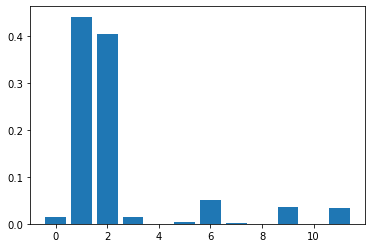

<BarContainer object of 12 artists>

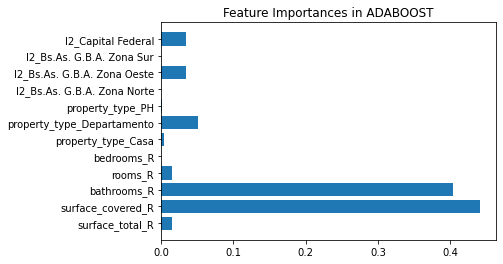

In [113]:
import matplotlib.pyplot as plt

# plot
plt.bar(range(len(ada_clf.feature_importances_)), ada_clf.feature_importances_)
plt.show()
plt.title('Feature Importances in ADABOOST')

plt.barh(lista_columnas, ada_clf.feature_importances_)

In [114]:
#Feature importances in XGBoost
print(model_1_base.feature_importances_)

[0.04083368 0.28614413 0.4813165  0.01657334 0.01114353 0.00247113
 0.08884536 0.00365331 0.00560679 0.00490503 0.00184765 0.05665956]


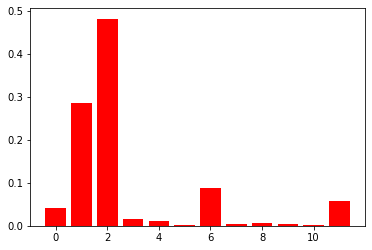

Text(0.5, 1.0, 'Feature Importances in XGBOOST')

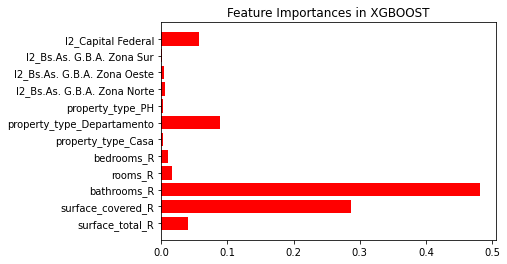

In [115]:
import matplotlib.pyplot as plt

# plot
plt.bar(range(len(model_1_base.feature_importances_)), model_1_base.feature_importances_, color = 'r')
plt.show()

plt.barh(lista_columnas, model_1_base.feature_importances_, color = 'r')
plt.title('Feature Importances in XGBOOST')

In [107]:
#Feature importances in Random Forest

print(model_2_base.feature_importances_)

[0.12984727 0.23043833 0.45516466 0.03342305 0.03077634 0.00370056
 0.06047327 0.00345588 0.00834299 0.0039734  0.00370398 0.03670027]


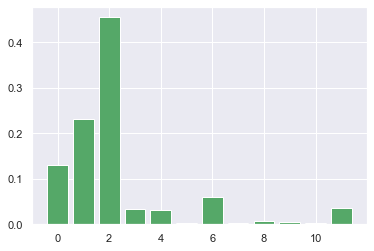

Text(0.5, 1.0, 'Feature Importances in Random Forest')

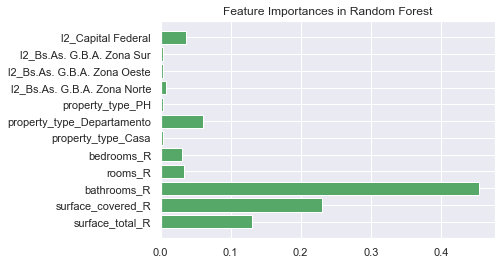

In [130]:
# plot
plt.bar(range(len(model_2_base.feature_importances_)), model_2_base.feature_importances_, color = 'g')
plt.show()

plt.barh(lista_columnas, model_2_base.feature_importances_, color = 'g')
plt.title('Feature Importances in Random Forest')

In [117]:
#XGBoost and Random Forest use bathrooms and surface_covered as great predictor variables
#On the other hand Rooms and Bethrooms are not good predictor variables

Testing this...

In [118]:
#Build different trees 
X = df.drop(['price'], axis=1) 
y = df['price']

# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [119]:
tree_ex = DecisionTreeRegressor(max_depth = 10, min_samples_split= 4)  
 
tree_ex.fit(X_train, y_train)

#Predict
prediction_tree_test =tree_ex.predict(X_test)
prediction_tree_train = tree_ex.predict(X_train)

#Evaluate

rmse_test_ex = sqrt(mean_squared_error(y_test, prediction_tree_test))
rmse_train_ex= sqrt(mean_squared_error(y_train, prediction_tree_train))
print(f'Mean Squared Error TEST: {rmse_test_ex}')
print(f'Mean Squared Error TRAIN: {rmse_train_ex}')

Mean Squared Error TEST: 82963.06779380876
Mean Squared Error TRAIN: 77648.67782684235


Text(0.5, 1.0, 'Feature Importances in Trees')

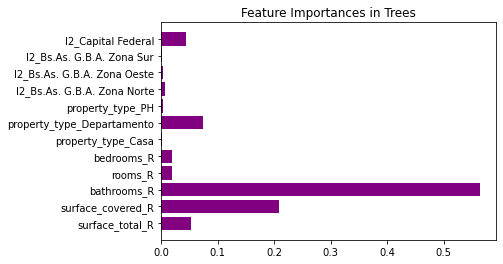

In [120]:
# plot
plt.barh(lista_columnas, tree_ex.feature_importances_, color = 'purple')
plt.title('Feature Importances in Trees')

In [121]:
#Change the variables and see the results

X = df.drop(['price', 'rooms_R', 'bedrooms_R'], axis=1) #test drop(['l2_R']) drop('rooms_R', 'bedrooms_R') drop('property_type_R'), etc
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [122]:
model_p = GradientBoostingRegressor()

In [123]:
model_p.fit(X_train, y_train)

prediction_model_p_test = model_p.predict(X_test)
prediction_model_p_train = model_p.predict(X_train)


rmse_test_p = sqrt(mean_squared_error(y_test, prediction_model_p_test))
rmse_train_p= sqrt(mean_squared_error(y_train, prediction_model_p_train))
print(f'Mean Squared Error TEST: {rmse_test_p}')
print(f'Mean Squared Error TRAIN: {rmse_train_p}')

Mean Squared Error TEST: 88248.45742305726
Mean Squared Error TRAIN: 86936.65412746277


In [124]:
model_pp = RandomForestRegressor()
model_pp.fit(X_train, y_train)

RandomForestRegressor()

In [125]:
y_train_model_pp = model_pp.predict(X_train)
y_test_model_pp = model_pp.predict(X_test)

rmse_train_pp = sqrt(mean_squared_error(y_train, y_train_model_pp))
rmse_test_pp = sqrt(mean_squared_error(y_test, y_test_model_pp))
print(f'Mean Squared Error TRAIN: {rmse_train_pp}')
print(f'Mean Squared Error TEST: {rmse_test_pp}')

Mean Squared Error TRAIN: 57693.726319930065
Mean Squared Error TEST: 77763.54235740443


We'll plot the errors

Random Forest


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


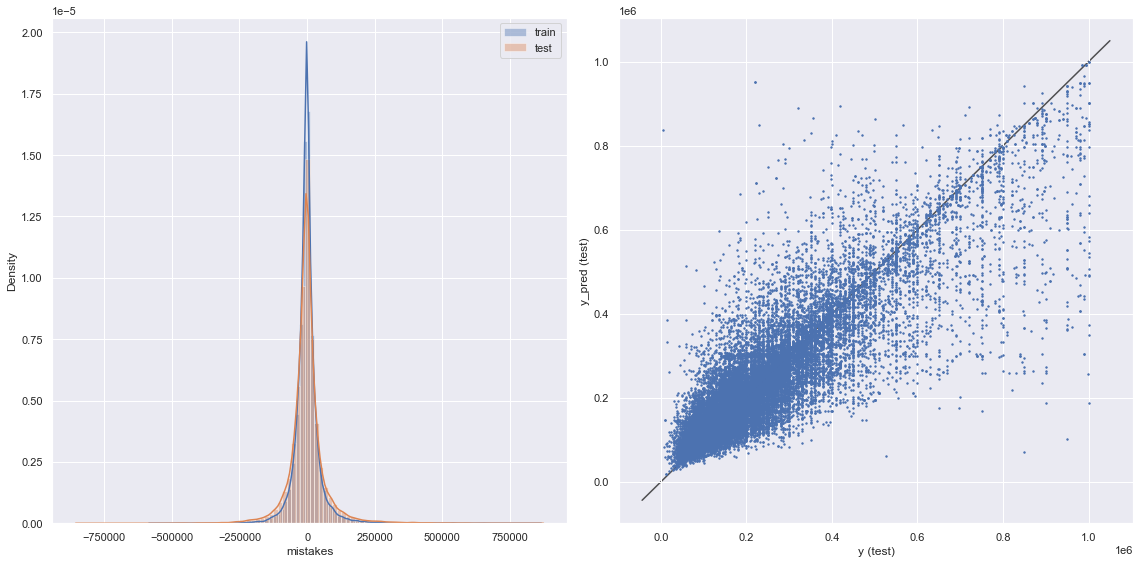

In [58]:
print("Random Forest")

plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
sns.distplot(y_train - pred_train_2, bins = 100, label = 'train')
sns.distplot(y_test - pred_test_2, bins = 100, label = 'test')
plt.xlabel('mistakes')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,pred_test_2, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

Gradient Boosting


C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


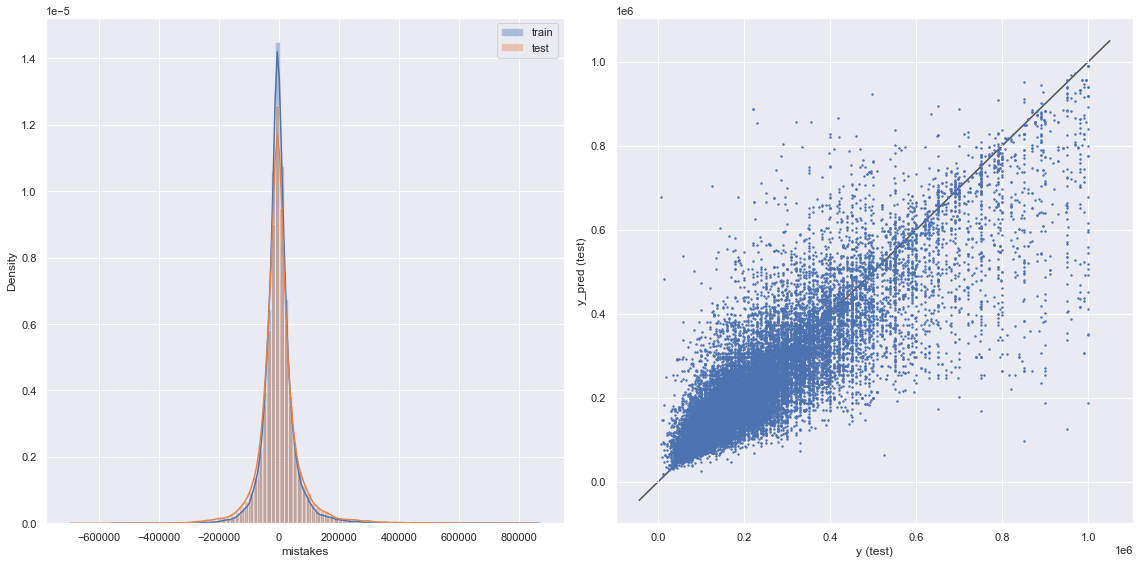

In [52]:
print("Gradient Boosting")

plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
sns.distplot(y_train - prediction_model_1_train, bins = 100, label = 'train')
sns.distplot(y_test - prediction_model_1_test, bins = 100, label = 'test')
plt.xlabel('mistakes')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,prediction_model_1_test, s =2)

'''
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
'''
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

#### Conclusions:

First of all, we saw the importance of features in advanced models...
In the three models, it coincides that the most important are 'bathrooms' and 'surface_covered'
Likewise, it agrees that 'rooms' and 'bedrooms' are of little importance.

Then, we were testing several regression trees and we noticed that when they have less depth, they are "simple" and concentrate their importance on 'bathrooms' and 'surface_covered'. 
As they become more complex, the importance of other features increases, as can occur in the case of 'surface_total', neighborhoods of 'L2' or even 'Department' in the type of property.
We emphasize that likewise, there comes a time when this growth stops and the model already begins to overfit (for example at depths greater than 30)


We test to see the important variables in our models and we analyze the model to see its error when modifying its variables, in order to see the impact it actually has.

We managed to notice that eliminating the predictor variables "bathrooms" and "surface covered" the error goes up USD 10,000 in XG BOOST and USD 16,000 in random forest, it's a lot!
At first, we concluded that both were very good predictor variables, which coincides with what was seen "theoretically" in the previous point.
Likewise, we continued investigating and when we tried to eliminate "rooms" and "bedrooms" (both at the same time), the errors did not increase as much (approx USD 3,000 in Boosting and USD 6,000 in Bagging), so we cannot consider them to be very relevant variables. However we can not subtract all the importance.

We keep trying and completely removing the L2 variable we see that the error goes up to about 5000USD (in Boosting) and the same thing happens when we remove "property type". This, then, tells us that discriminating by type of property and by neighborhood is more relevant than having the variables 'Rooms' and 'bathrooms'...

We conclude, then, that bathrooms and surfaces are the best variables to predict what we have, and also being able to count on "L2" (the neighborhood) and the type of property, both help to reduce this error considerably. We had already noticed this when encoding and testing the models of part A (we tested them before and after doing it). 


Finally, it is the set of all the variables that helps us to have the lowest possible error, and taking into account that we do an important cleaning of the dataset, it is not cumbersome or annoying for us to be able to use all the variables that we are left with. . Likewise, in the case of Random forest, we can notice with greater emphasis that the errors when modifying the variables increase much more.

Looking at the distribution of errors, we notice that it does not seem to be skewed to the right or to the left, it would be more like a "normal distribution". We appreciate the peaks in the center that indicate where the errors are concentrated. That is, the errors are concentrated at zero (or around it). It should be noted that in the train, the errors are increasingly concentrated at zero, but both (train and test) have similar distributions. So, the model capture more and more observations when we get closer to zero, however, the error increases in more expensive houses.



How to improve the model?

Personally, I believe that the model could be improved initially from a better preprocessing. We could try to find a better and greater correlation between the surfaces and the variable to be predicted (price). I also think we could look at the outliers in bathrooms to see if there are any and eliminate them by trying to increase the correlation with the price as well.
I believe that the variable L3 could be incorporated, which, although it would enlarge the dataset quite a bit, could help us make our predictions more accurate since it would be each specific neighborhood (and we know that a property does not turn out the same in Palermo as in San Telmo, for example ).